# <center> Task 1 : Prediction using supervised machine learning algorithm <center>

## Queries : 

* Perdict the percentage of a student based on the number of study hours using __linear regression__
* What will be the predicted score if a student studies for 9.25 hrs a day?

## <center> 1. Implementation of linear regression using sklearn <center>

### Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory data analysis

#### Checking if there is any missing values

In [3]:
for i in data.columns:
    print(f'The number of missing values in {i} is {data[i].isnull().sum()}')

The number of missing values in Hours is 0
The number of missing values in Scores is 0


#### Checking the correlation of the features

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting the distribution of the independent variable

array([[<AxesSubplot:title={'center':'Hours'}>]], dtype=object)

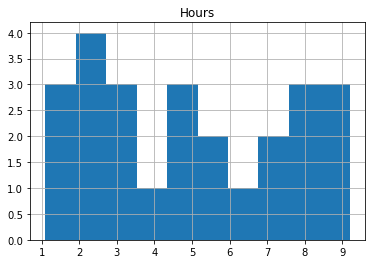

In [5]:
data[['Hours']].hist(bins=10)

#### Checking if there is any outliers

<AxesSubplot:>

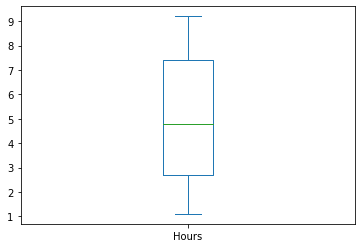

In [6]:
data[['Hours']].plot.box()

#### Plotting the independent variable

Text(0, 0.5, 'Scores based on hours')

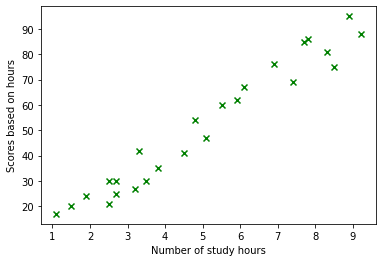

In [7]:
plt.scatter(x=data[['Hours']],y=data[['Scores']],color='green',marker='x')
plt.xlabel('Number of study hours')
plt.ylabel('Scores based on hours')

### Data splitting

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Hours']], data[['Scores']], test_size = 0.3)
print(f'The shape of the training data : {x_train.shape},{y_train.shape}')
print(f'The shape of the testing data : {x_test.shape},{y_test.shape}')

The shape of the training data : (17, 1),(17, 1)
The shape of the testing data : (8, 1),(8, 1)


### Model creation

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [11]:
y_pred = model.predict(x_test)

### Plotting the linear line fitted by the model

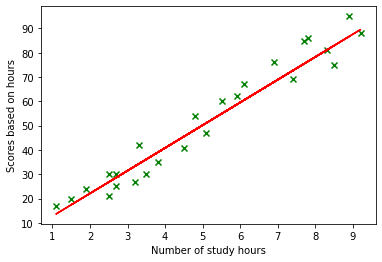

In [12]:
line = model.coef_[0] * data['Hours'] + model.intercept_
plt.scatter(x=data[['Hours']],y=data[['Scores']],color='green',marker='x')
plt.plot(data['Hours'],line,color='red')
plt.xlabel('Number of study hours')
plt.ylabel('Scores based on hours')
plt.show()

### Evaluating the model

In [13]:
from sklearn.metrics import mean_squared_error
print(f'Mean_Squared_error : {mean_squared_error(y_test,y_pred)}')
print(f'Root_Mean_Squared_error : {(mean_squared_error(y_test,y_pred)**0.5)}')
print(f'The score of the model : {model.score(x_train,y_train)}')

Mean_Squared_error : 33.27212189610112
Root_Mean_Squared_error : 5.768199190050662
The score of the model : 0.9430982676246716


### What will be the predicted score if a student studies for 9.25 hrs a day? 

In [14]:
d = pd.DataFrame(data=[9.25],columns=['Hours'])
model_prediction = model.predict(d)
print(f'If a student studies 9.25 hrs a day he will score : {model_prediction[0][0]}')

If a student studies 9.25 hrs a day he will score : 89.99093062789352


## <center> 2. Implementation of linear regression from scratch <center>

#### The basic equation for line equation
$$ ybar = w*X + b $$
#### The cost function for linear regression
$$ J(w,b) = \frac {\sum_{i=1}^m (ybar^i - y^i)^2}{2m}$$
#### The Gradient descend algorithm for linear regression
$$ w := w - \frac{\alpha}{m} \sum_{i=1}^m(ybar^i - y^i)*x^i$$
$$ b := b -  \frac{\alpha}{m} \sum_{i=1}^m(ybar^i - y^i)$$
#### Evaluation metrics 
##### 1. Mean squared error : $$ \frac{\sum_{i=1}^m (ybar^i - y^i)^2}{m} $$
##### 2. Root mean squared error : $$ \sqrt {\frac{\sum_{i=1}^m (ybar^i - y^i)^2}{m}} $$
##### 3. R2 error : $$ \frac{\sum_{i=1}^m (ybar^i - ymean^i)^2}{\sum_{i=1}^m (y^i - ymean^i)^2} $$



#### where,
<center> w is the coefficient and b is the intercept of the line <center>
<center> ybar is the predicted value <center>
<center> m is the length of the X values <center>
<center> $$ \alpha $$ is the learning rate for gradient descent <center>

### Declaring independent and dependent variable

In [15]:
X = data['Hours']
y = data['Scores']
print(f'-----X-----\n{X.head()}')
print(f'-----y-----\n{y.head()}')

-----X-----
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64
-----y-----
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


### Plotting the independent variable vs the dependent variable

Text(0, 0.5, 'Scores based on hours')

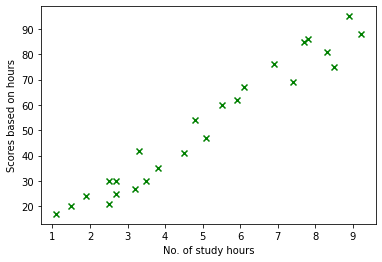

In [16]:
plt.scatter(X,y,color='green',marker='x')
plt.xlabel('No. of study hours')
plt.ylabel('Scores based on hours')

### Initializing the parameters

In [17]:
w = 0 
b = 0
alpha = 0.01
count = 1000
m = float(len(X))

### Implementing linear regression

In [18]:
for i in range(count):
    y_bar = w * X + b
    w = w - (alpha/m) * sum(X * (y_bar-y))
    b = b-((alpha/m)*(sum(y_bar-y)))

print('The coefficient of the line : ',w)
print('The intercept of the line : ',b)
line = w *X + b

The coefficient of the line :  9.79686727860809
The intercept of the line :  2.3531789358052344


### Plotting the linear fitted by the calculated parameters

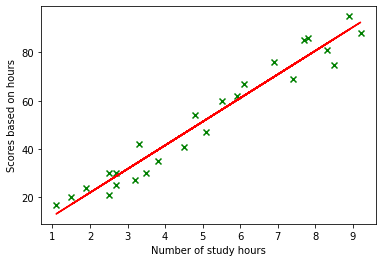

In [19]:
plt.scatter(X,y,color='green',marker='x')
plt.plot(X,line,color='red')
plt.xlabel('Number of study hours')
plt.ylabel('Scores based on hours')
plt.show()

### Evaluation metrics

In [20]:
# Implementing mean squared error from scratch
def mean_squared_error(m,y,y_bar):
    for i in range(int(m)):
        mse = (y[i] - y_bar[i])/m
    return mse*100

# Implementing r2 error from scratch
def r2_error(m,y,y_bar):
    y_mean = sum(y)/len(y)
    for i in range(len(y)):
        r2_1 = y_bar[i] - y_mean
        r2_2 = y[i] - y_mean
    r2 = r2_1/r2_2
    return r2

print(f'The mean squared error of the model : {mean_squared_error(m,y,y_bar)}')
print(f'The root mean squared error of the model : {(mean_squared_error(m,y,y_bar)**(1/2))}')
print(f'The R squared error of the model : {r2_error(m,y,y_bar)}')

The mean squared error of the model : 28.924766431201704
The root mean squared error of the model : 5.378175009350449
The R squared error of the model : 0.7905216799594315


### What will be the predicted score if a student studies for 9.25 hrs a day?

In [21]:
y_bar1 = w* 9.25 + b
print(f'If a student studies 9.25 hrs a day he will score : {y_bar1}')

If a student studies 9.25 hrs a day he will score : 92.97420126293007
